In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Linear Regression

In [ ]:
df = pd.read_csv("Google_train_data.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df['Close'] = df['Close'].str.replace(",","").astype(float)

In [ ]:
df['Volume'] = df['Volume'].str.replace(",","").astype(float)

In [ ]:
for col in [ 'Open', 'High', 'Low', 'Volume']:
 df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1,1))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,-1.372855,-1.340653,-1.355794,663.59,1.857776
1,1/4/2012,-1.333209,-1.333854,-1.328483,666.45,1.140122
2,1/5/2012,-1.342692,-1.354253,-1.343036,657.21,1.510102
3,1/6/2012,-1.352505,-1.367198,-1.364366,648.24,0.988988
4,1/9/2012,-1.393995,-1.409566,-1.458855,620.76,3.753349


In [ ]:
x=df.drop(['Date','Close'],axis=1)
y=df['Close']

In [ ]:
x.head()

,Open,High,Low,Volume
0,-1.372855,-1.340653,-1.355794,1.857776
1,-1.333209,-1.333854,-1.328483,1.140122
2,-1.342692,-1.354253,-1.343036,1.510102
3,-1.352505,-1.367198,-1.364366,0.988988
4,-1.393995,-1.409566,-1.458855,3.753349


In [ ]:
y

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predicted = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [ ]:
np.sqrt(mean_absolute_error(y_test, y_predicted))

10.496102453745198

In [ ]:
rmse

21872.21249600586

In [ ]:
r2

0.21985776419715786

# LSTM

In [ ]:
#1
data = pd.read_csv("Google_train_data.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
#2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data['Close'] = data['Close'].str.replace(",","").astype(float)
data['Volume'] = data['Volume'].str.replace(",","").astype(float)

In [ ]:
data.describe()

In [ ]:
data=data.dropna()

In [ ]:
#3
trainData = data.iloc[:,4:5].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#4
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1258, 1)

In [ ]:
#5
x_train = []
y_train = []

for i in range (30,1258):
  x_train.append(trainData[i-30:i,0])
  y_train.append(trainData[i,0])
#6
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
#7
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1228, 30, 1)

In [ ]:
#8
model = Sequential()
model.add(LSTM(units=200,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(units=150,return_sequences=True))
model.add(LSTM(units=100,return_sequences=True))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=1))
#9
model.compile(optimizer='adam',loss='mean_squared_error')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
history = model.fit(x_train,y_train ,validation_split=0.2,epochs = 30,batch_size=32,verbose=1,callbacks = es)

Epoch 1/30
31/31 [==============================] - 25s 255ms/step - loss: 0.0259 - val_loss: 0.0015
Epoch 2/30
31/31 [==============================] - 6s 201ms/step - loss: 0.0089 - val_loss: 0.0011
Epoch 3/30
31/31 [==============================] - 6s 206ms/step - loss: 0.0085 - val_loss: 0.0013
Epoch 4/30
31/31 [==============================] - 6s 203ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 5/30
31/31 [==============================] - 6s 205ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 6/30
31/31 [==============================] - 6s 204ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 7/30
31/31 [==============================] - 6s 203ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 8/30
31/31 [==============================] - 7s 230ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 9/30
31/31 [==============================] - 6s 202ms/step - loss: 0.0039 - val_loss: 7.7132e-04
Epoch 10/30
31/31 [==============================] - 6s 208ms/step - loss: 0.0025 - val_loss: 6

In [ ]:
import matplotlib.pyplot as plt

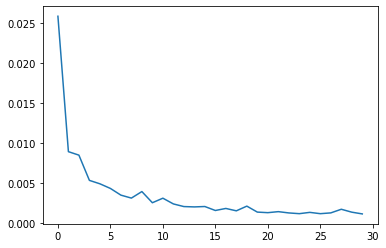

In [ ]:
#10
plt.plot(history.history['loss'])

In [ ]:
#11
testData=pd.read_csv("Google_test_data.csv")
testData['Close']=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[30:,0:].values

In [ ]:
testData.shape

(252, 1)

In [ ]:
#12
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled =sc.transform(inputClosing)
inputClosing_scaled.shape

(252, 1)

In [ ]:
#13
x_test = []
length = len(testData)
timestep = 30


for i in range (timestep,length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape
                    

(222, 30, 1)

In [ ]:
#14
y_pred = model.predict(x_test)

In [ ]:
#15
predicted_price = sc.inverse_transform(y_pred)

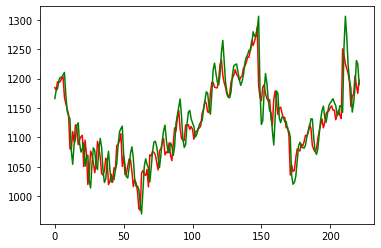

In [ ]:
#16
plt.plot(y_test,color='red',label= 'actual')
plt.plot(predicted_price,color = 'green',label='predicted')

In [ ]:
#17
np.sqrt(mean_absolute_error(y_test, predicted_price))

4.436573307515723

In [ ]:
r2_score(y_test, predicted_price)

0.8152038740036428

In [ ]:
#19
last_train_batch = inputClosing_scaled[-30:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, 30, 1))

In [ ]:
model.predict(last_train_batch)

array([[0.97068644]], dtype=float32)

In [ ]:
#10
test_predictions = []

first_eval_batch = inputClosing_scaled[-30:]
current_batch = first_eval_batch.reshape((1, 30, 1))

for i in range(10):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = sc.inverse_transform(test_predictions)

In [ ]:
true_predictions.shape

(10, 1)

In [ ]:
inputClosing_scaled.shape

(252, 1)

In [ ]:
len(predicted_price)

222

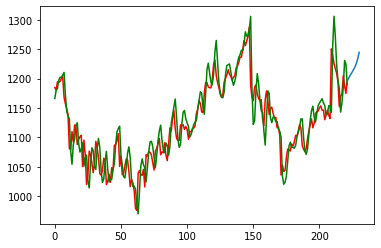

In [ ]:
plt.plot(y_test,color='red',label= 'actual')
plt.plot(predicted_price,color = 'green',label='predicted')
plt.plot(np.arange(221,231),true_predictions)

ARIMA for future prediction

In [ ]:
#1
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 25.4 MB/s 
     |████████████████████████████████| 9.8 MB 37.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#2
data=pd.read_csv("Google_train_data.csv")

In [ ]:
data['Close'] = data['Close'].str.replace(",","").astype(float)
data['Volume'] = data['Volume'].str.replace(",","").astype(float)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0


In [ ]:
#3
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [ ]:
df = data[["Close"]].copy()

In [ ]:
df.describe()

,Close
count,1258.000000
mean,712.669666
std,164.752591
min,491.200000
25%,576.740000
50%,695.675000
75%,782.105000
max,1216.830000


In [ ]:
# Check if close price series is stationary
#4
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.0614664448846467
p-value: 0.2602886338105421


In [ ]:
#5
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#6
step_fit = auto_arima(df.Close,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11003.918, Time=2.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10998.027, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10998.534, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10998.533, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10996.053, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11000.535, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.144 seconds


In [ ]:
#7
train= df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(1228, 1) (30, 1)


In [ ]:
#8
import statsmodels.api as sm

In [ ]:
#9
model = sm.tsa.arima.ARIMA(df.Close, order=(0, 1, 0))
result = model.fit()

In [ ]:
step_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5497.026
Date:                Fri, 24 Jun 2022   AIC                          10996.053
Time:                        12:40:33   BIC                          11001.189
Sample:                             0   HQIC                         10997.983
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       368.1129      0.828    444.739      0.000     366.491     369.735
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):          20734342.34
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                           -20.81
Prob(H) (two-sided):                  0.00   Kurtosis:                       630.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#10
start = len(train)
end=len(train)+len(test)-1
pred = result.predict(start=start,end=end)
print(pred)

1228    764.456313
1229    771.942633
1230    760.341912
1231    769.704988
1232    768.131183
1233    760.959077
1234    761.763543
1235    768.424941
1236    771.026181
1237    757.775018
1238    747.672692
1239    750.434207
1240    762.843451
1241    759.107682
1242    771.908538
1243    776.631269
1244    790.051151
1245    789.456371
1246    796.666703
1247    797.205453
1248    798.098824
1249    790.664636
1250    794.432781
1251    796.476051
1252    794.652920
1253    791.278898
1254    789.925428
1255    791.647027
1256    784.888680
1257    782.828792
Name: predicted_mean, dtype: float64


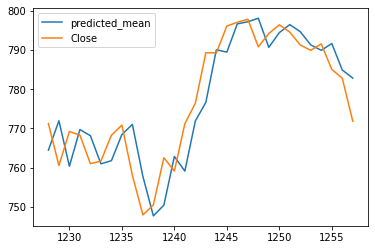

In [ ]:
#11
pred.plot(legend=True)
test.Close.plot(legend=True)

In [ ]:
#12
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(test.Close,pred))

6.879735852980393

In [ ]:
r2_score(test.Close, pred)

0.7942153499507737

In [ ]:
#13

In [ ]:
test_df=pd.read_csv("Google_test_data.csv")

In [ ]:
model = sm.tsa.arima.ARIMA(test_df.Close, order=(0, 1, 0))
result = model.fit()

In [ ]:
#14
prediction = result.predict(start=len(test_df),end=len(test_df)+10)

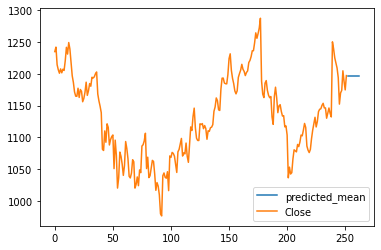

In [ ]:
prediction.plot(legend=True)
test_df.Close.plot(legend=True)